# Netflix IMDB Data Analysis

## Dataset Source
This dataset comes from Kaggle and contains Netflix TV shows and movies with IMDB ratings.

## About Script
This script is designed by Saatwik Mehta and analyzes the dataset below to present findings by using graphs and descriptive statistics.


# Importing the Data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/NetflixIMDB.csv")
df.head() # Makes sure that data is correctly imported


,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


# First Look at Dataset

In [40]:
df.info() #shows general overview of the dataset
df.shape #shows the amount of rows and columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


(5283, 11)

# Check for Missing Values

In [21]:
df.isna().sum().sort_values(ascending=False) #Checks for total missing values per column then sorts by the column with the most missing

# age_certificiation is missing a lot of values and it may affect analysis if used

age_certification    2285
imdb_votes             16
description             5
index                   0
id                      0
title                   0
type                    0
release_year            0
runtime                 0
imdb_id                 0
imdb_score              0
dtype: int64

## Data Summaries

In this section, I will answer some questions about the dataset, such as:

- How many movies vs TV shows are there?
- What is the average IMDB score?
- Do movies and shows have different average scores?


### Counts of Movies vs TV shows

In [33]:
CountDiff = df["type"].value_counts()
print("There are", CountDiff["MOVIE"],"Movies")
print("There are", CountDiff["SHOW"],"TV Shows")



There are 3407 Movies
There are 1876 TV Shows


### Avg IMDB Rating across all movies and TV shows

In [28]:
avgscore = df["imdb_score"].mean()
print("Average IMDB rating in the dataset is", round(avgscore, 2), "/ 10")

Average IMDB rating in the dataset is 6.53 / 10


### Comparing Average IMDB score between movies and TV shows

In [31]:
AvgType = df.groupby("type")["imdb_score"].mean()
print("Average IMDB score for Movies:", round(AvgType["MOVIE"], 2))
print("Average IMDB score for TV Shows:", round(AvgType["SHOW"], 2))


Average IMDB score for Movies: 6.27
Average IMDB score for TV Shows: 7.02


## Visualizations

The following graphs help visualize the summaries from above.


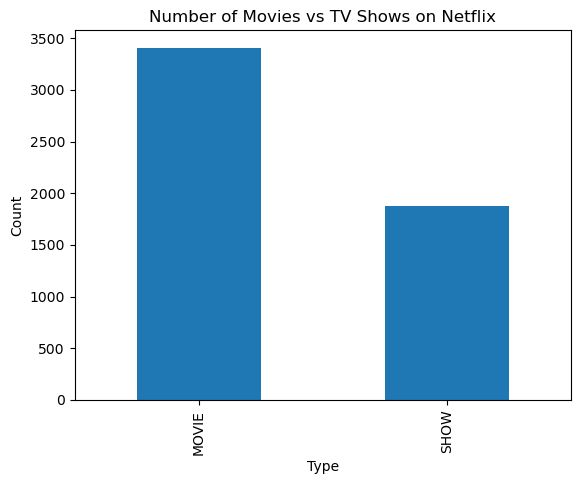

In [35]:
## Bar chart that shows the diffrence between how many movies and tv shows there are
CountDiff.plot(kind="bar")
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()



This bar chart shows that Netflix has more movies than TV shows in this dataset.


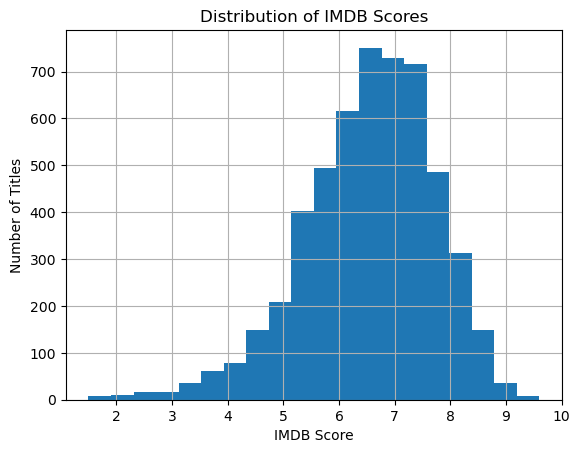

In [36]:
df["imdb_score"].dropna().hist(bins=20)
plt.title("Distribution of IMDB Scores")
plt.xlabel("IMDB Score")
plt.ylabel("Number of Titles")
plt.show()


This histogram shows how IMDB ratings are spread across Netflix titles.
Most ratings appear to be between about 5 and 8.


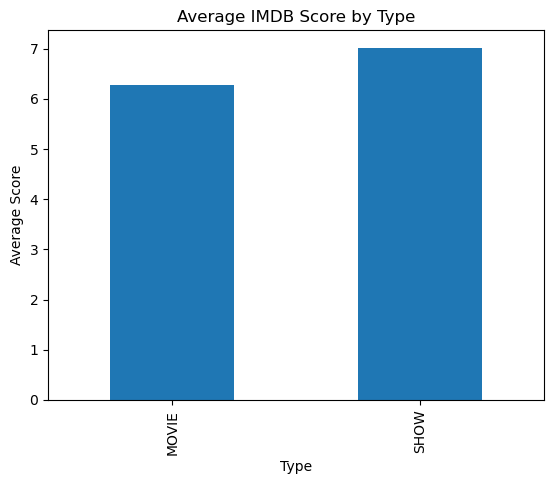

In [37]:
AvgType.plot(kind="bar")
plt.title("Average IMDB Score by Type")
plt.xlabel("Type")
plt.ylabel("Average Score")
plt.show()


This graph compares the average IMDB ratings of movies and TV shows.
TV shows have a higher average rating than movies in this dataset.


## Summary of Findings

By building this script and analyzing this dataset I found out that: 

- There are more movies than TV shows on Netflix
- The average IMDB rating across all titles is about 6.53 out of 10
- TV shows have higher average ratings than movies
- Most IMDB scores fall between about 5 and 8


